# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this project, our goal is to predict the aution sale price for a piece of heavy equipment to create a 'blue book' for bulldozers. 

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

Our data is gotten from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

The data for this project is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set, which contains data from May 1, 2012 - November 2012.

## 3. Evaluation

> The evaluation metric for this project is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

We can get more details on the evaluation of this project from: 
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project is to build a machine learning model which minimises RMSLE.

## 4. Features

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction
* saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary. Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.

The `machine_appendix.csv` file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the datasets (training, evaluation, etc.). 

Kaggle provides a data dictionary detailing all of the features of the dataset. We have shown it below for reference.

In [1]:
# Install openpyxl to enable us read the data dictionary, which is in xlsx
import sys
!conda install -y --prefix {sys.prefix} openpyxl

Solving environment: done

# All requested packages already installed.



In [2]:
import pandas as pd
data_dict = pd.read_excel('data/bluebook-for-bulldozers/Data Dictionary.xlsx')
data_dict = data_dict[['Variable','Description']]
data_dict

/Users/tosinakingbemisilu/Desktop/ds_project/env/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Variable,Description
0,SalesID,unique identifier of a particular sale of a ...
1,MachineID,identifier for a particular machine; machin...
2,ModelID,identifier for a unique machine model (i.e. ...
3,datasource,source of the sale record; some sources are...
4,auctioneerID,"identifier of a particular auctioneer, i.e. ..."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...
7,UsageBand,"value (low, medium, high) calculated compari..."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


In [3]:
# importing our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
# Import training and validation sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

### Parsing dates

Our date is currently specified as an object. Working with time series requires enriching the time and date component as much as possible. We can do that by telling pandas which of our coluns has dates in it using the `parse dates` parameter.

In [6]:
# Import data again but this time using the parse dates
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [7]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [8]:
# Look at our columns number of null values clearly
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

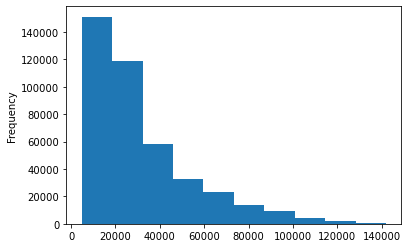

In [9]:
# Explore the distribution of our target variable, SalePrice
df.SalePrice.plot.hist();

A large portion of our sale price data are below 20,000usd and our sale price data is right skewed.

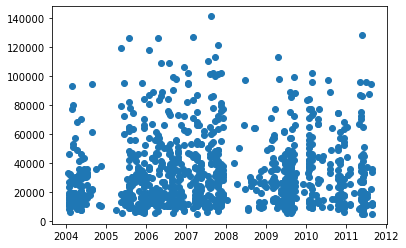

In [10]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [11]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# View all our columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it is a good idea to sort it by date.

In [14]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

This is necessary to ensure we still have the original data when we manipulate the copy.

In [15]:
# Make a copy of our DataFrame
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [16]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [17]:
df_tmp[['saledate','saleYear','saleMonth','saleDay','saleDayOfWeek','saleDayOfYear']].head(10)

,saledate,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1989-01-17,1989,1,17,1,17
274835,1989-01-31,1989,1,31,1,31
141296,1989-01-31,1989,1,31,1,31
212552,1989-01-31,1989,1,31,1,31
62755,1989-01-31,1989,1,31,1,31
54653,1989-01-31,1989,1,31,1,31
81383,1989-01-31,1989,1,31,1,31
204924,1989-01-31,1989,1,31,1,31
135376,1989-01-31,1989,1,31,1,31
113390,1989-01-31,1989,1,31,1,31


In [18]:
# Now we've enriched our DataFrame with date time features, we can remove saledate
df_tmp.drop('saledate', axis=1, inplace=True)

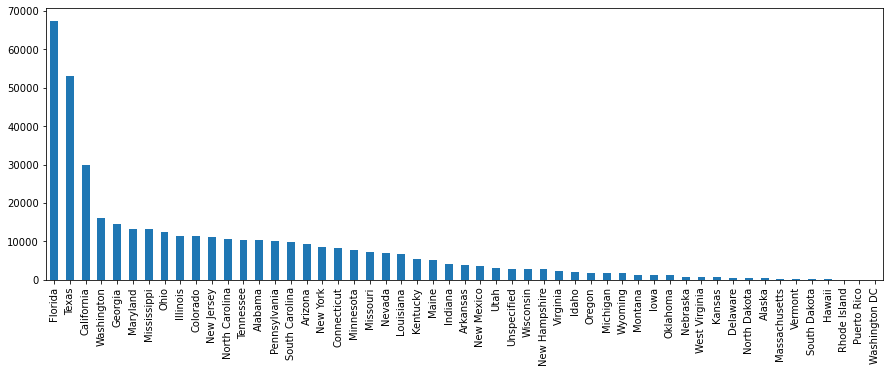

In [19]:
# Check the values of different columns
# Number of Sales by US States
df_tmp.state.value_counts().plot.bar(figsize=(15,5));

Florida had the highest number of sales over time, while Washington DC had the lowest number of sales over the years. As expected, this affected the total amount in usd generated from the sales for the top and bottom 3 as shown below.

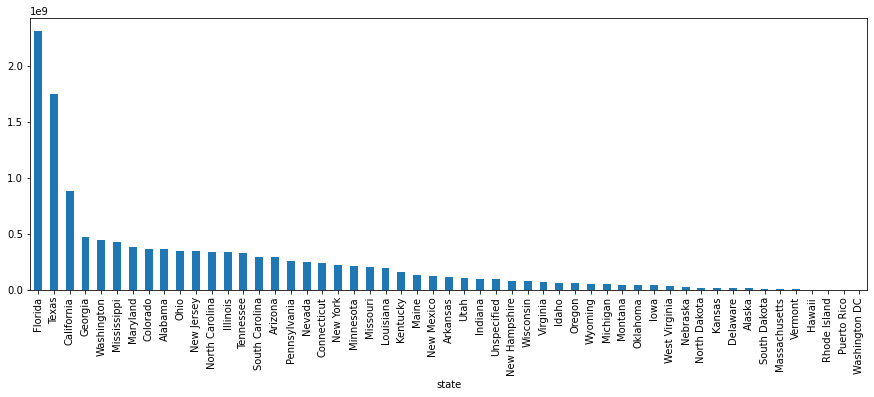

In [20]:
# Amount of Sales by US States
df_tmp.groupby('state')['SalePrice'].sum().sort_values(ascending=False).plot.bar(figsize=(15,5));

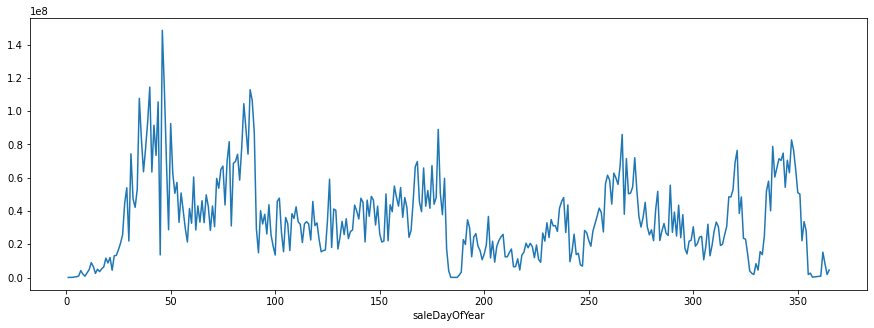

In [21]:
# Amount of sales by DayofYear
df_tmp.groupby('saleDayOfYear')['SalePrice'].sum().plot(figsize=(15,5));

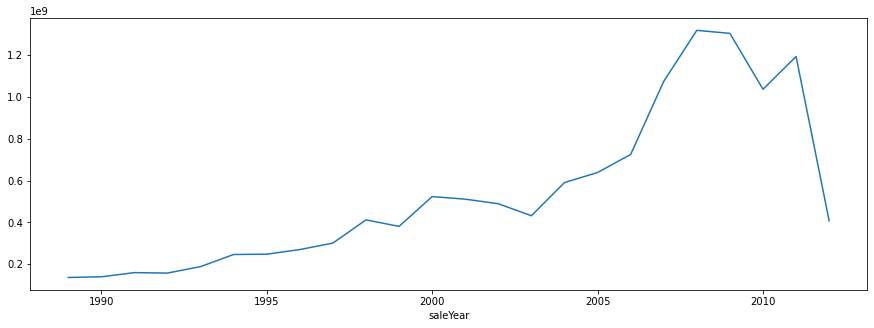

In [22]:
# Amount of sales by Year
df_tmp.groupby('saleYear')['SalePrice'].sum().plot(figsize=(15,5));

There has been improvement in sales over the years in comparison with previous years, except for the huge decline in 2012. Could this be 2012 does not have all the months included? Let's check the bottom 5 of our `df_tmp`.

In [23]:
df_tmp[['saleYear','saleMonth']].tail(5)

,saleYear,saleMonth
410879,2012,4
412476,2012,4
411927,2012,4
407124,2012,4
409203,2012,4


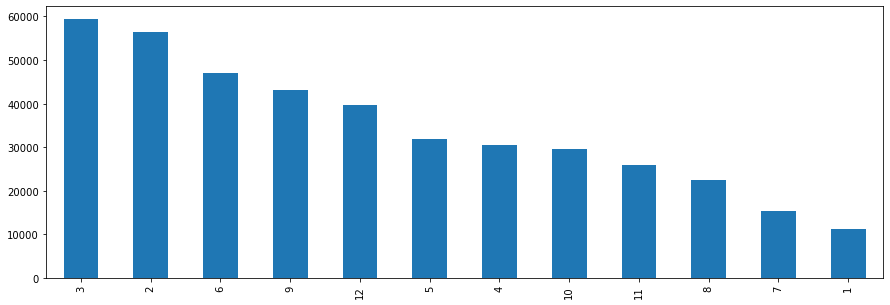

In [24]:
# Number of sales by Month
df_tmp.saleMonth.value_counts().plot.bar(figsize=(15,5));

Over the years, the month of March had the highest number of sales, while January had the lowest. February however, had the highest total amount in usd generated by just a slight difference compared to March.

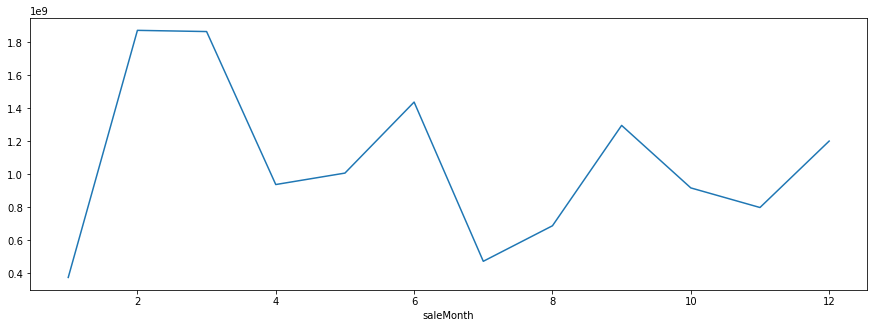

In [25]:
# Amount of sales by Month
df_tmp.groupby('saleMonth')['SalePrice'].sum().plot(figsize=(15,5));

The goal of this project is to do more of model-driven EDA, so we will go ahead with that in the next step.

## 5. Modelling

### Cleaning our data and making it ready for our machine learning model

We still have some of our columns as objects, floats, and a lot of null values, so we will try to clean all these before fitting our model.

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Convert String to categories

To turn all of our data into numbers, we will be converting them into pandas categories

In [28]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# Turn all string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

Now, under the hood, pandas will treat our categories as code, instead of strings, since we have converted them to category. Let's look at one of the column; `state`.

In [30]:
df_tmp.state.cat.codes.head(5)

205615    43
274835     8
141296     8
212552     8
62755      8
dtype: int8

Above shows that for all the strings (unique) in each of the columns with labels, which we have specified, pandas has assigned a code to each of them, which we would use for our machine learning model. However, we still have a lot of missing data, which we would look at next. Once again, let's look at the percentage of missing data in each of our column.

In [31]:
# Check columns with missing data converting them to the percentage of missing data in each column
missing_data = round(df_tmp.isnull().sum()/len(df_tmp)*100,1)
missing_data[missing_data > 0]

auctioneerID                 4.9
MachineHoursCurrentMeter    64.3
UsageBand                   82.1
fiSecondaryDesc             34.1
fiModelSeries               85.8
fiModelDescriptor           81.9
ProductSize                 52.5
Drive_System                74.1
Enclosure                    0.1
Forks                       52.1
Pad_Type                    80.3
Ride_Control                63.0
Stick                       80.3
Transmission                54.4
Turbocharged                80.3
Blade_Extension             93.7
Blade_Width                 93.7
Enclosure_Type              93.7
Engine_Horsepower           93.7
Hydraulics                  20.0
Pushblock                   93.7
Ripper                      74.1
Scarifier                   93.7
Tip_Control                 93.7
Tire_Size                   76.3
Coupler                     46.5
Coupler_System              89.1
Grouser_Tracks              89.1
Hydraulics_Flow             89.1
Track_Type                  75.2
Undercarri

We have some columns like `Blade_Extension, Blade_Width, Enclosure_Type, and Engine_Horsepower` that has the highest percentage (93.7%) of missing data.

### Fill Missing Values

### Fill numerical missing values first

In [32]:
# Check our numeric columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [33]:
# Check which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [35]:
# Check again if there is any numeric columns with null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Great! We had an empty print, which means we have sorted out the filling of our numerical columns. Now, we go ahead to fill the missing categorical values

### Filling and turning categorical variables into numbers

In [36]:
# Check for columns which aren't numeric and have null values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


When we turned our string columns into categories, we had access to an attribute called codes, which gave us a numerical values for all of the variables in that column

In [37]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column which tells us if the data was missing or not
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [38]:
# Check for columns which aren't numeric and have null values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [42]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [44]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Great! We no longer have missing values and all our data are now numeric.

### Building our Machine Learning Model

In [46]:
# Build our machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)

In [48]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


### Splitting our data into train/validation sets

We will split our data into training set which would contain all of our data through the end of 2011, using the `saleYear` column we created earlier, and then our validation set will contain data for 2012.

In [49]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [50]:
# Split data into X & y
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building our evaluation function

In [58]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    calculate root mean squared log error between predictions and true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Validation MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Validation RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Validation R^2': r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [52]:
# # This takes far too long... for experimenting on our RandomForestRegressor()

# %%time
# model.fit(X_train, y_train)

In [53]:
# We could slice our training data into 10000rows using below, but we would use randomforestregressor built-in function
# model.fit(X_train[:100000], y_train[:10000])

In [54]:
# Change max_samples value in our model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [55]:
%%time
# Cutting down on the max number of samples, each estimator can see improved training time
model.fit(X_train, y_train)

CPU times: user 23 s, sys: 395 ms, total: 23.4 s
Wall time: 4.55 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [59]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

### Hyperparameter Tuning with RandomizedSearchCV

In [62]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 2min 52s, sys: 12.4 s, total: 3min 4s
Wall time: 3min 45s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [63]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [64]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6766.762830426458,
 'Validation MAE': 8262.862619450769,
 'Training RMSLE': 0.3014009481157158,
 'Validation RMSLE': 0.32787197320423006,
 'Training R^2': 0.7986846294658537,
 'Validation R^2': 0.7721031352303754}

This actually got worst than our baseline score

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`, which took about 2hours on a different PC.

In [67]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 2min, sys: 510 ms, total: 2min
Wall time: 16.7 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [68]:
show_scores(ideal_model)

{'Training MAE': 2953.816113716348,
 'Validation MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Validation RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Validation R^2': 0.8818019502450094}

### Make Predictions on test data

In [69]:
# Import the test data
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


This is a new data which is similar to our initial dataset before we processed it, thereby containing missing data, column with strings (objects) and does not have the exact format with our processed data we trained and validated on. We will therefore go ahead to preprocess the data (getting the dataset in thesame format as our training dataset.

### Preprocessing the test data

In [70]:
# Create a function to preprocess any new data based on how we formatted the training data
def preprocess_data(df):
    '''
    Performs transformations on df and returns transformed df.
    '''
    df.sort_values(by=['saledate'], inplace=True, ascending=True)
    
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
    # Fill categorical missing data and turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column which tells us if the data was missing or not
            df[label+'_is_missing'] = pd.isnull(content)
            # Turn categories into numbers and add +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [71]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


We have 101 columns and it is worth noting that `df_test` does not have the label since we will be using it to predict. Just to be sure the number of columns in our test data and our training data are thesame, let's look at our training data again, otherwise, this would give an error when running our prediction.

In [73]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


Ok! This means we have one column missing in our test data. We can find how the column differs using sets

In [74]:
# Find the column that differs using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

So, `auctioneerID_is_missing` was not created since all the data was available during preprocessing. We will therefore need to add this manually.

In [76]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test['auctioneerID_is_missing'] = False

In [77]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,False
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,False
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,False
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,False,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,True,True,True,True,True,False


Finally, now our test dataframe has thesame features as our training dataframe, and we can go ahead to make predictions.

In [78]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)
test_preds

/Users/tosinakingbemisilu/Desktop/ds_project/env/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([15714.81284149, 18097.59646274, 24327.53868135, ...,
       44400.22163686, 43881.42236246, 39232.57367976])

This has been requested to be in the format which includes the `SalesID`.

In [81]:
# Format predictions into the same format requested
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds = df_preds.sort_index()
df_preds

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [82]:
# Export prediction data
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv', index=False)

### Feature Importance

We would like to figure out which different attributes of the data were most important when it comes to predicting the target variable (SalePrice)

In [94]:
# Find feature importance of our best model
# Create a helper function to plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(7,10))
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

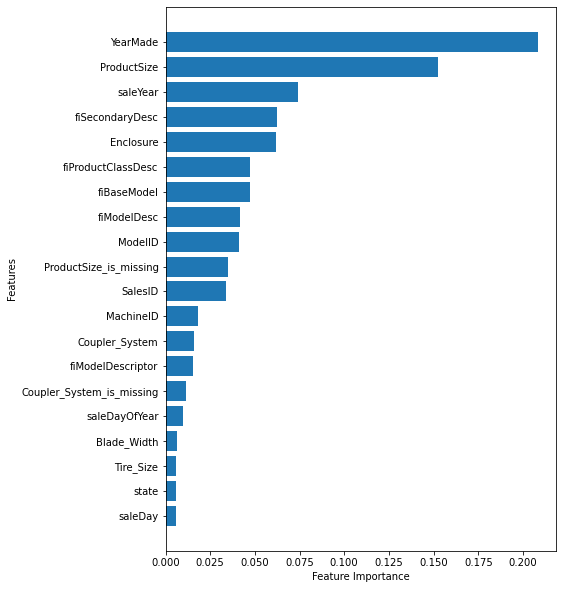

In [95]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [96]:
df['Enclosure'].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64